In [1]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### I - Virat Kohli Dataset

In [2]:
df = pd.read_csv("virat.csv")

In [3]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


#### Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

    a)16.5
    b)22.5
    c)26.5
    d)32.5



In [4]:
## Your code here
df.Runs = df.Runs.apply(lambda x: x.replace('*','')).astype('int32')
df.dtypes

Runs           int32
Mins          object
BF             int64
4s             int64
6s             int64
SR            object
Pos            int64
Dismissal     object
Inns           int64
Opposition    object
Ground        object
Start Date    object
dtype: object

In [8]:
IQRv = df.Runs.quantile(.5) - df.Runs.quantile(.25)
IQRv

np.float64(22.5)

#### Box Plots

Question 2: Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

    a)100-120
    b)120-140
    c)140-160
    d)160-180


{'whiskers': [<matplotlib.lines.Line2D at 0x2030902c190>,
 'caps': [<matplotlib.lines.Line2D at 0x2030902ead0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2030842a710>],
 'medians': [<matplotlib.lines.Line2D at 0x2030902ed50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2030902ee90>],
 'means': []}

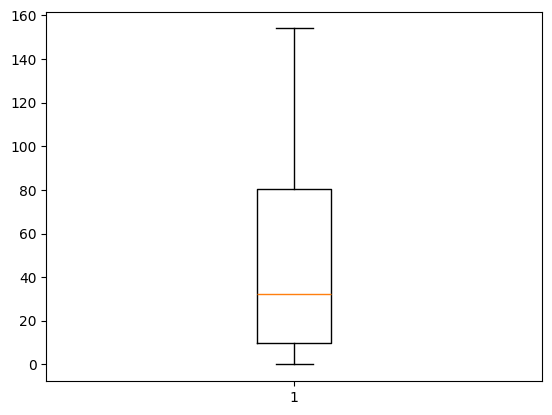

In [9]:
#Your code here
plt.boxplot(df.Runs)

#### False Statement

Q3:Consider the following statements and choose the correct option

     I - Virat has played the maximum number of matches in 2011
     II - Virat has the highest run average in the year 2017
     III - Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

    a)I and II
    b)I and III
    c)II
    d)III



In [43]:
## Your code here
# Convert 'Start Date' to datetime
df['Start Date'] = pd.to_datetime(df['Start Date'], format='%d-%b-%y')

# Extract the year
df['year'] = df['Start Date'].dt.year

# Virat has played the maximum number of matches in 2011.
matches_per_year = df.groupby('year')['Inns'].count()
# Get the year with maximum matches
max_year = matches_per_year.idxmax()
max_matches = matches_per_year.max()

max_year, max_matches

(np.int32(2011), np.int64(31))

In [47]:
#II - Virat has the highest run average in the year 2017.
yearly_avg = df.groupby('year').agg({'Runs': 'sum', 'Inns': 'sum'})

yearly_avg['Average'] = yearly_avg['Runs'] / yearly_avg['Inns']
yearly_avg


,Runs,Inns,Average
year,,,
2008,159,7,22.714286
2009,230,9,25.555556
2010,726,26,27.923077
2011,1302,49,26.571429
2012,444,17,26.117647
2013,1100,36,30.555556
2014,995,28,35.535714
2015,304,15,20.266667
2016,739,16,46.187500


In [48]:
# # Find the year with highest average
highest_avg_year = yearly_avg['Average'].idxmax()
highest_avg_value = yearly_avg['Average'].max()

print(f"Virat had the highest batting average in the year {highest_avg_year} with an average of {highest_avg_value:.2f}.")

Virat had the highest batting average in the year 2016 with an average of 46.19.


In [49]:
#III - Across all the years, Virat has scored his highest score in a single match and also has the highest run average in the same year - 2016.

# Step 1: Find the year in which Virat scored his highest individual score
highest_score = df['Runs'].max()
year_of_highest_score = df.loc[df['Runs'].idxmax(), 'year']

# Step 2: Calculate batting average per year = Total Runs / Total Inns
yearly_stats = df.groupby('year').agg({'Runs': 'sum', 'Inns': 'sum'})
yearly_stats['Average'] = yearly_stats['Runs'] / yearly_stats['Inns']

# Step 2: Find the year with the highest average
year_with_highest_avg = yearly_stats['Average'].idxmax()

# Step 3: Print results
print(f"Highest individual score: {highest_score} in year {year_of_highest_score}")
print(f"Highest batting average year: {year_with_highest_avg} with average {yearly_stats.loc[year_with_highest_avg, 'Average']:.2f}")

# Step 4: Check if both happened in the same year
if year_of_highest_score == year_with_highest_avg:
    print("✅ Yes, both the highest score and highest average occurred in the same year.")
else:
    print("❌ No, they did not occur in the same year.")

Highest individual score: 154 in year 2016
Highest batting average year: 2016 with average 46.19
✅ Yes, both the highest score and highest average occurred in the same year.


#### Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

D - [1, 14.4)

    a)A - [54.6,68)
    b)B - [68,81.4)
    c)C - [121.6,135)
    d)D - [1, 14.4)


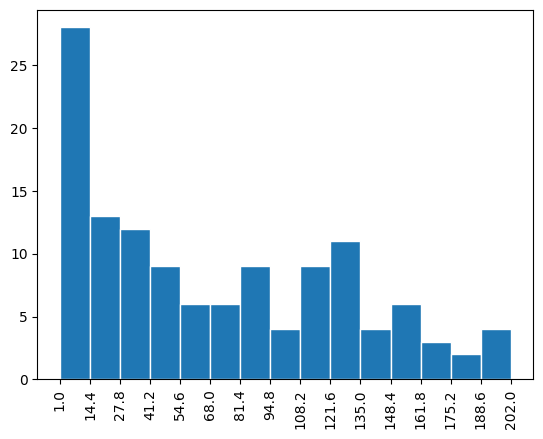

In [67]:
#Your code here
df = df[~(df['Mins']== "-")]
df['Mins'] = df['Mins'].apply(lambda x: int(x))

q1, bins, q2 = plt.hist(df.Mins, bins=15, edgecolor='white' )
plt.xticks(bins)
plt.xticks(rotation=90)
plt.show()